<a href="https://colab.research.google.com/github/tejasrane032/quiz-app/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn.datasets import fetch_20newsgroups

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# **Data Loading**

In [26]:
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

print(newsgroups.target_names[:5])  # First 5 categories
print(len(newsgroups.data))         # No. of documents

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
18846


# **Data Splitting**

In [45]:
train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

print("Training samples:", len(train_data.data))
print("Test samples:",len(test_data.data))
print("Number of classes:", len(train_data.target_names))

Training samples: 11314
Test samples: 7532
Number of classes: 20


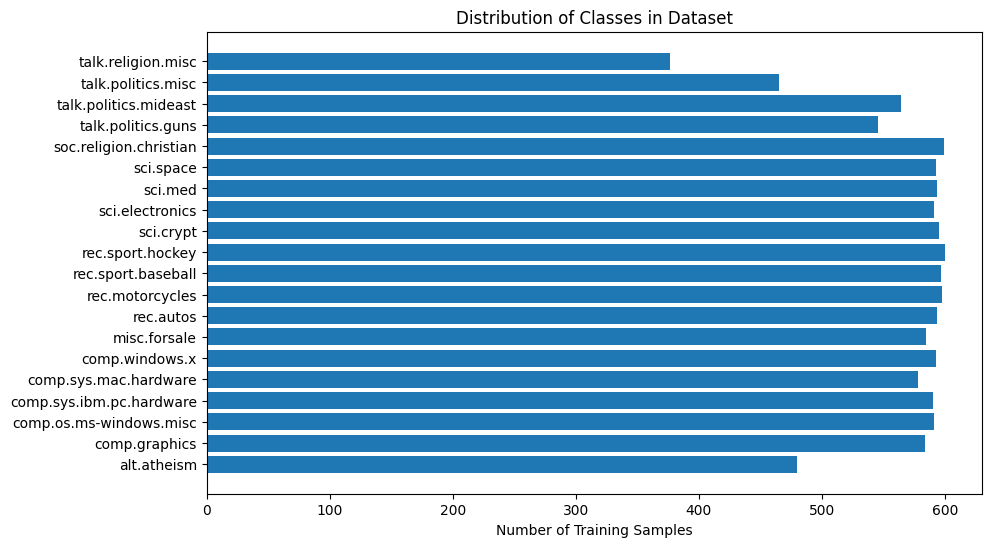

In [28]:
# Count samples per category
category_counts = np.bincount(train_data.target)
categories = train_data.target_names

plt.figure(figsize=(10, 6))
plt.barh(categories, category_counts)
plt.xlabel("Number of Training Samples")
plt.title("Distribution of Classes in Dataset")
plt.show()


# **Feature Engineering**

In [29]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
X_train = vectorizer.fit_transform(train_data.data)
X_test = vectorizer.transform(test_data.data)

y_train = train_data.target
y_test = test_data.target

print("Feature matrix shape:", X_train.shape)


Feature matrix shape: (11314, 129791)


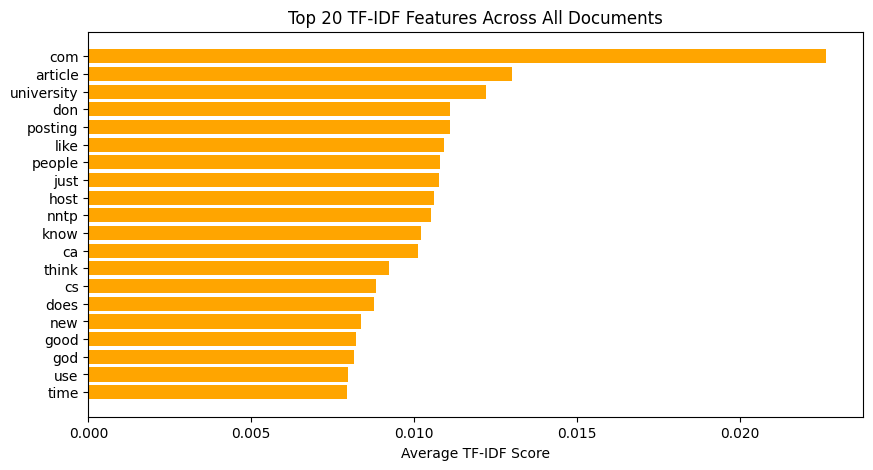

In [30]:
# Extract feature names and its importance
feature_names = vectorizer.get_feature_names_out()
avg_tfidf = X_train.mean(axis=0).A1
tfidf_df = pd.DataFrame({'term': feature_names, 'score': avg_tfidf})
top_words = tfidf_df.sort_values('score', ascending=False).head(20)

plt.figure(figsize=(10, 5))
plt.barh(top_words['term'], top_words['score'], color='orange')
plt.gca().invert_yaxis()
plt.title("Top 20 TF-IDF Features Across All Documents")
plt.xlabel("Average TF-IDF Score")
plt.show()


# **Feature Extraction**

In [31]:
svd = TruncatedSVD(n_components=500)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

print("Reduced feature shape:", X_train_reduced.shape)
print("Reduced feature shape:", X_test_reduced.shape)

Reduced feature shape: (11314, 500)
Reduced feature shape: (7532, 500)


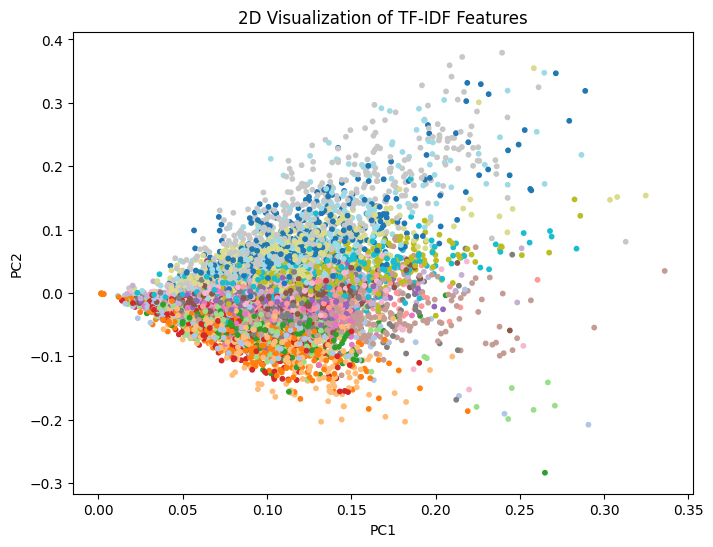

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='tab20', s=10)
plt.title("2D Visualization of TF-IDF Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# **Naive Bayes**

In [33]:
nb = MultinomialNB()

# Hyperparameter tuning
param_grid = {'alpha': [0.1, 0.5, 1.0]}

nb_model = GridSearchCV(nb, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
nb_model.fit(X_train, y_train)

best_nb = nb_model.best_estimator_

y_predt_nb = best_nb.predict(X_test)
print("Best alpha:", nb_model.best_params_)
print("Test Accuracy:", metrics.accuracy_score(y_test, y_predt_nb))

Best alpha: {'alpha': 0.1}
Test Accuracy: 0.8359001593202336


In [34]:
print(metrics.classification_report(y_test, y_predt_nb))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       319
           1       0.76      0.74      0.75       389
           2       0.76      0.68      0.72       394
           3       0.67      0.77      0.72       392
           4       0.87      0.85      0.86       385
           5       0.86      0.81      0.83       395
           6       0.85      0.79      0.82       390
           7       0.90      0.90      0.90       396
           8       0.92      0.97      0.94       398
           9       0.94      0.94      0.94       397
          10       0.92      0.98      0.95       399
          11       0.84      0.95      0.89       396
          12       0.82      0.76      0.79       393
          13       0.91      0.84      0.87       396
          14       0.85      0.93      0.89       394
          15       0.73      0.96      0.83       398
          16       0.71      0.94      0.81       364
          17       0.95    

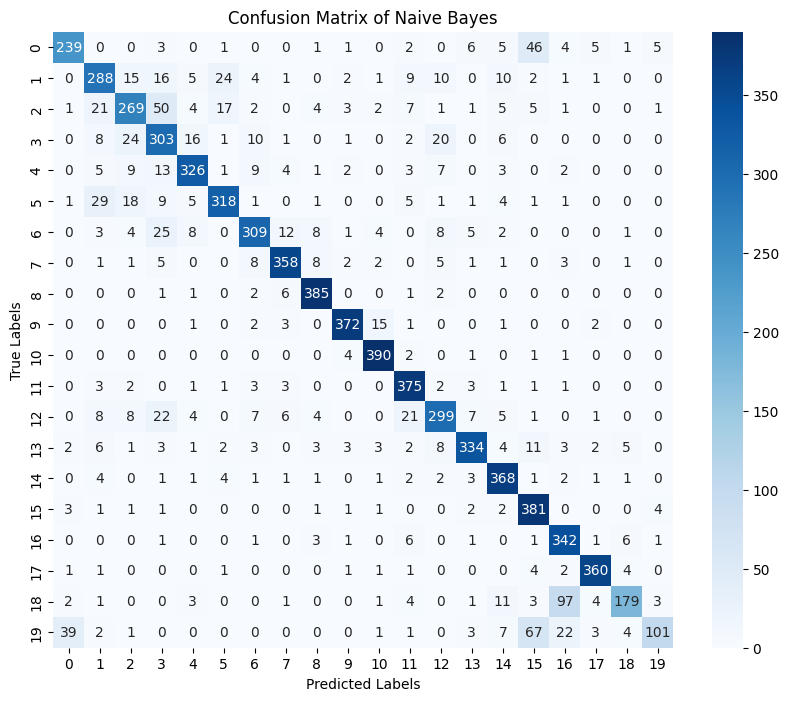

In [35]:
cm = metrics.confusion_matrix(y_test, y_predt_nb)
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix of Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **Support Vector Machine**

In [36]:
# SVM model
svm = LinearSVC()

# Define hyperparameter grid
params = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}

# GridSearchCV
svm_model = GridSearchCV(svm, params, cv=3, n_jobs=-1, scoring='accuracy')
svm_model.fit(X_train_reduced, y_train)

# Best model
best_svm = svm_model.best_estimator_

y_predt_svm = best_svm.predict(X_test_reduced)
print("Best Parameters:", svm_model.best_params_)
print("Test Accuracy:", metrics.accuracy_score(y_test, y_predt_svm))


Best Parameters: {'C': 1, 'max_iter': 1000}
Test Accuracy: 0.8178438661710037


In [37]:
print(metrics.classification_report(y_test, y_predt_svm))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       319
           1       0.72      0.75      0.73       389
           2       0.73      0.73      0.73       394
           3       0.70      0.67      0.68       392
           4       0.77      0.80      0.78       385
           5       0.82      0.76      0.79       395
           6       0.80      0.84      0.82       390
           7       0.89      0.88      0.88       396
           8       0.93      0.93      0.93       398
           9       0.90      0.92      0.91       397
          10       0.93      0.97      0.95       399
          11       0.92      0.94      0.93       396
          12       0.73      0.70      0.72       393
          13       0.83      0.85      0.84       396
          14       0.88      0.92      0.90       394
          15       0.82      0.91      0.86       398
          16       0.72      0.88      0.79       364
          17       0.93    

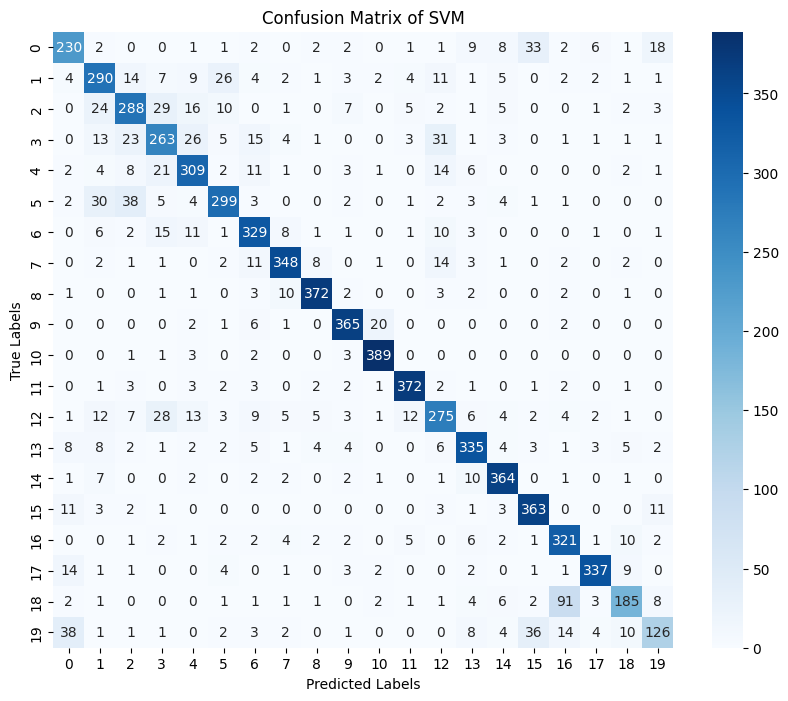

In [38]:
cm = metrics.confusion_matrix(y_test, y_predt_svm)
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix of SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **Logistic Regression**

In [39]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_reduced, y_train)
log_predt = log_model.predict(X_test_reduced)

print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, log_predt))


Logistic Regression Accuracy: 0.7943441317047265


In [40]:
print(metrics.classification_report(y_test, log_predt))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       319
           1       0.63      0.75      0.69       389
           2       0.71      0.74      0.72       394
           3       0.67      0.67      0.67       392
           4       0.77      0.77      0.77       385
           5       0.78      0.72      0.75       395
           6       0.76      0.83      0.79       390
           7       0.84      0.85      0.85       396
           8       0.91      0.93      0.92       398
           9       0.90      0.90      0.90       397
          10       0.91      0.95      0.93       399
          11       0.95      0.88      0.92       396
          12       0.66      0.71      0.68       393
          13       0.83      0.81      0.82       396
          14       0.88      0.87      0.87       394
          15       0.78      0.91      0.84       398
          16       0.72      0.86      0.78       364
          17       0.96    

# **Random Forest**

In [41]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)

rf.fit(X_train_reduced, y_train)

y_pred_rf = rf.predict(X_test_reduced)

print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7271640998406798


In [42]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66       319
           1       0.54      0.66      0.59       389
           2       0.68      0.70      0.69       394
           3       0.58      0.57      0.58       392
           4       0.70      0.68      0.69       385
           5       0.68      0.68      0.68       395
           6       0.66      0.77      0.71       390
           7       0.79      0.79      0.79       396
           8       0.87      0.86      0.87       398
           9       0.83      0.85      0.84       397
          10       0.90      0.91      0.90       399
          11       0.90      0.82      0.86       396
          12       0.55      0.49      0.52       393
          13       0.68      0.75      0.71       396
          14       0.78      0.80      0.79       394
          15       0.69      0.90      0.78       398
          16       0.69      0.81      0.74       364
          17       0.92    

# **Model Performance Summary**

In [43]:
print("Model Performances:")
print("Naive Bayes Accuracy:", metrics.accuracy_score(y_test, y_predt_nb))
print("SVM Accuracy:", metrics.accuracy_score(y_test, y_predt_svm))
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, log_predt))
print('Random Forest Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))

Model Performances:
Naive Bayes Accuracy: 0.8359001593202336
SVM Accuracy: 0.8178438661710037
Logistic Regression Accuracy: 0.7943441317047265
Random Forest Accuracy: 0.7271640998406798


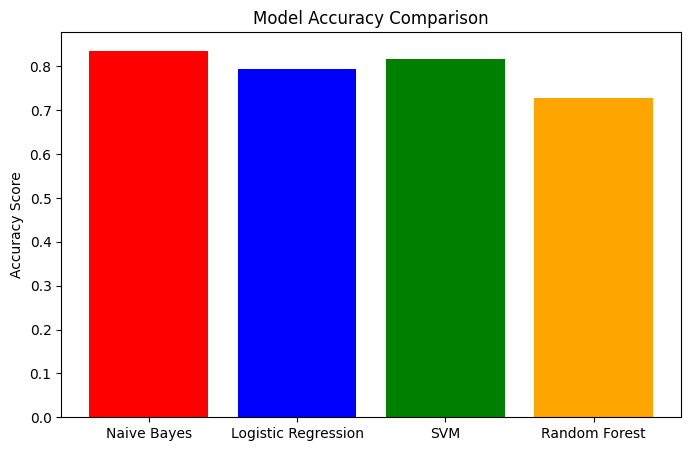

In [44]:
# Create accuracy summary
model_names = ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest']
accuracies = [
    metrics.accuracy_score(y_test, y_predt_nb),
    metrics.accuracy_score(y_test, log_predt),
    metrics.accuracy_score(y_test, y_predt_svm),
    metrics.accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['red', 'blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()
